# Project 3 API and NLP with Relationship and Dating Subreddits

## Imports

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

import time

import regex as re

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words

from sklearn import preprocessing

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import confusion_matrix

#from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tringuyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
url = 'https://api.pushshift.io/reddit/search/submission'

## Relationship Advice Subreddit Gathering

In [3]:
params = {
    'subreddit': 'relationship_advice',
    'size':1000,
}
res = requests.get(url, params)
res.status_code

200

In [4]:
data = res.json()
posts = data['data']
len(posts)

1000

In [5]:
df_rel = pd.DataFrame(posts)
df_rel=df_rel[['subreddit','title','selftext']]
df_rel

,subreddit,title,selftext
0,relationship_advice,Am I paranoid about my relationship?,So me and my other half have been together 2/3...
1,relationship_advice,Unsure of how to reveal unusual fetishized to ...,"Okay, so this may make me seem like a creeper,..."
2,relationship_advice,I (17F) am super embarrassed by a conversation...,My friend and I both go to the same high schoo...
3,relationship_advice,How do you feel about your SO watching porn?,I typically don’t have an issue with it in gen...
4,relationship_advice,My (25 M) gf (24 F) uses too much toilet paper...,"Obligatory, I am posting this on a new account..."
...,...,...,...
995,relationship_advice,(TW) Am I the bad guy for wanting to leave my ...,[deleted]
996,relationship_advice,"IM IN A PICKLE WITH MY EX, WHAT DO I DO?",There was a college blacklight party last week...
997,relationship_advice,Husband constantly talks about how attractive ...,My (25F) and my husband (25M) have been togeth...
998,relationship_advice,Positive marriage stories after a rough patch?,Can someone please give me a positive story if...


In [6]:
df_rel.to_csv('../datasets/rel.csv',index=False)

## Dating Advice Subreddit Gathering

In [7]:
params_2 = {
    'subreddit': 'dating_advice',
    'size':1000,
}
res_2 = res = requests.get(url, params_2)
res_2.status_code

200

In [8]:
data_2 = res_2.json()
posts_2 = data_2['data']
len(posts_2)

1000

In [9]:
df_dat = pd.DataFrame(posts_2)
df_dat = df_dat[['subreddit','title','selftext',]]
df_dat

,subreddit,title,selftext
0,dating_advice,Everything ends in being ghosted.,[20M from NJ] Everything from dates to texts t...
1,dating_advice,xpost from relationship advice...GF posting sc...,\n\nThanks in advance!\n\nThe situation is a ...
2,dating_advice,Should I keep trying but take things slower or...,Met this girl. We went out 6-7 times over the ...
3,dating_advice,How do I get a date for Valentine's/prom in la...,I'm 17m and have been pretty lonely since my e...
4,dating_advice,Rejected the worst way possible,I (M23)was dating a female (F21)or 3 years whe...
...,...,...,...
995,dating_advice,Very confused,So im in a situation that is very confusing ri...
996,dating_advice,Date chatting on her phone during movie,oof?
997,dating_advice,Should I try to change my date plans?,So I met a girl about a week ago in college an...
998,dating_advice,I am too scared to have sex because it will hu...,I'm almost 25 and a virgin. I have had guys as...


In [10]:
df_dat.to_csv('../datasets/dat.csv',index=False)

## Combine Dataframes

In [11]:
rel_dat = pd.concat([df_rel,df_dat],axis=0,sort=False)
rel_dat.head()

,subreddit,title,selftext
0,relationship_advice,Am I paranoid about my relationship?,So me and my other half have been together 2/3...
1,relationship_advice,Unsure of how to reveal unusual fetishized to ...,"Okay, so this may make me seem like a creeper,..."
2,relationship_advice,I (17F) am super embarrassed by a conversation...,My friend and I both go to the same high schoo...
3,relationship_advice,How do you feel about your SO watching porn?,I typically don’t have an issue with it in gen...
4,relationship_advice,My (25 M) gf (24 F) uses too much toilet paper...,"Obligatory, I am posting this on a new account..."


In [12]:
rel_dat['subreddit'].value_counts()

dating_advice          1000
relationship_advice    1000
Name: subreddit, dtype: int64

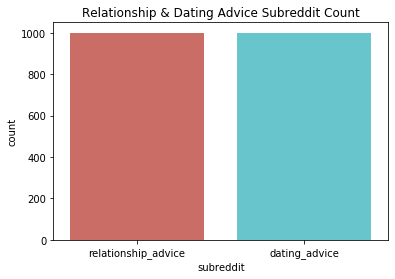

In [13]:
sns.countplot(x=rel_dat['subreddit'], data=rel_dat, palette='hls')
plt.title('Relationship & Dating Advice Subreddit Count'),
# plt.xlabel(map({0:'dating_advice',1:'relationship_advice'}),
plt.show()
# plt.savefig('count_plot')

In [14]:
# df['label'] = df['label'].map({'ham': 0, 'spam': 1})
# df.head()
rel_dat['subreddit']=rel_dat['subreddit'].map({'dating_advice':0,'relationship_advice':1})
rel_dat.head()

,subreddit,title,selftext
0,1,Am I paranoid about my relationship?,So me and my other half have been together 2/3...
1,1,Unsure of how to reveal unusual fetishized to ...,"Okay, so this may make me seem like a creeper,..."
2,1,I (17F) am super embarrassed by a conversation...,My friend and I both go to the same high schoo...
3,1,How do you feel about your SO watching porn?,I typically don’t have an issue with it in gen...
4,1,My (25 M) gf (24 F) uses too much toilet paper...,"Obligatory, I am posting this on a new account..."


## Combine title and selftext to increase accuracy

In [15]:
rel_dat['title_selftext']= rel_dat['title']+ ' ' +rel_dat['selftext']
rel_dat.head()

,subreddit,title,selftext,title_selftext
0,1,Am I paranoid about my relationship?,So me and my other half have been together 2/3...,Am I paranoid about my relationship? So me and...
1,1,Unsure of how to reveal unusual fetishized to ...,"Okay, so this may make me seem like a creeper,...",Unsure of how to reveal unusual fetishized to ...
2,1,I (17F) am super embarrassed by a conversation...,My friend and I both go to the same high schoo...,I (17F) am super embarrassed by a conversation...
3,1,How do you feel about your SO watching porn?,I typically don’t have an issue with it in gen...,How do you feel about your SO watching porn? I...
4,1,My (25 M) gf (24 F) uses too much toilet paper...,"Obligatory, I am posting this on a new account...",My (25 M) gf (24 F) uses too much toilet paper...


## NLP

In [16]:
rel_dat.isnull().sum()

subreddit          0
title              0
selftext          15
title_selftext    15
dtype: int64

In [17]:
rel_dat.shape

(2000, 4)

In [18]:
rel_dat.dropna(inplace=True)

In [19]:
rel_dat.drop_duplicates()

,subreddit,title,selftext,title_selftext
0,1,Am I paranoid about my relationship?,So me and my other half have been together 2/3...,Am I paranoid about my relationship? So me and...
1,1,Unsure of how to reveal unusual fetishized to ...,"Okay, so this may make me seem like a creeper,...",Unsure of how to reveal unusual fetishized to ...
2,1,I (17F) am super embarrassed by a conversation...,My friend and I both go to the same high schoo...,I (17F) am super embarrassed by a conversation...
3,1,How do you feel about your SO watching porn?,I typically don’t have an issue with it in gen...,How do you feel about your SO watching porn? I...
4,1,My (25 M) gf (24 F) uses too much toilet paper...,"Obligatory, I am posting this on a new account...",My (25 M) gf (24 F) uses too much toilet paper...
...,...,...,...,...
995,0,Very confused,So im in a situation that is very confusing ri...,Very confused So im in a situation that is ver...
996,0,Date chatting on her phone during movie,oof?,Date chatting on her phone during movie oof?
997,0,Should I try to change my date plans?,So I met a girl about a week ago in college an...,Should I try to change my date plans? So I met...
998,0,I am too scared to have sex because it will hu...,I'm almost 25 and a virgin. I have had guys as...,I am too scared to have sex because it will hu...


In [20]:
rel_dat = rel_dat[~rel_dat['selftext'].isin(['[deleted]','(deleted)'])]

In [21]:
rel_dat = rel_dat[~rel_dat['title'].isin(['[deleted]','(deleted)'])]

In [22]:
rel_dat

,subreddit,title,selftext,title_selftext
0,1,Am I paranoid about my relationship?,So me and my other half have been together 2/3...,Am I paranoid about my relationship? So me and...
1,1,Unsure of how to reveal unusual fetishized to ...,"Okay, so this may make me seem like a creeper,...",Unsure of how to reveal unusual fetishized to ...
2,1,I (17F) am super embarrassed by a conversation...,My friend and I both go to the same high schoo...,I (17F) am super embarrassed by a conversation...
3,1,How do you feel about your SO watching porn?,I typically don’t have an issue with it in gen...,How do you feel about your SO watching porn? I...
4,1,My (25 M) gf (24 F) uses too much toilet paper...,"Obligatory, I am posting this on a new account...",My (25 M) gf (24 F) uses too much toilet paper...
...,...,...,...,...
995,0,Very confused,So im in a situation that is very confusing ri...,Very confused So im in a situation that is ver...
996,0,Date chatting on her phone during movie,oof?,Date chatting on her phone during movie oof?
997,0,Should I try to change my date plans?,So I met a girl about a week ago in college an...,Should I try to change my date plans? So I met...
998,0,I am too scared to have sex because it will hu...,I'm almost 25 and a virgin. I have had guys as...,I am too scared to have sex because it will hu...


In [23]:
rel_dat.shape

(1970, 4)

In [24]:
rel_dat.to_csv('../datasets/rel_dat.csv',index=False)

## Model Prep: X and y variables

In [25]:
X = rel_dat['selftext']
y = rel_dat['subreddit']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    stratify= y,
                                                    random_state = 42)

## Base Accuracy Score

In [27]:
y.value_counts(normalize=True)

1    0.507107
0    0.492893
Name: subreddit, dtype: float64

In [28]:
WordNetLemmatizer()

<WordNetLemmatizer>

## Checking Words

In [29]:
cvec = CountVectorizer(stop_words='english',
                             max_features=100,
                             min_df=2,
                             max_df= .98,
                             ngram_range=(1,2))

In [30]:
cvec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.98, max_features=100, min_df=2,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [31]:
cvec.transform(X_train)

<1319x100 sparse matrix of type '<class 'numpy.int64'>'
	with 27114 stored elements in Compressed Sparse Row format>

In [32]:
X_train_cv = cvec.transform(X_train)

In [33]:
X_test_cv = cvec.transform(X_test)

In [34]:
X_train_cv.shape

(1319, 100)

In [35]:
type(X_train_cv)

scipy.sparse.csr.csr_matrix

In [36]:
words = pd.DataFrame(
    X_train_cv.todense(),
    columns = cvec.get_feature_names()
)

In [37]:
words.sum().sort_values(ascending=False).head(20)

just            1914
like            1852
don             1315
know            1259
ve              1165
really          1125
time            1122
want            1117
feel             967
said             826
relationship     773
told             695
things           694
friends          683
going            660
didn             630
think            611
girl             570
years            539
day              519
dtype: int64

## Confusion Matrix Logistic Regression

In [38]:
lr= LogisticRegression()
lr.fit(X_train_cv,y_train)

/Users/tringuyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
pred_lr = lr.predict(X_test_cv)
cm_lr = confusion_matrix(y_test, pred_lr)

In [40]:
cm_lr_df = pd.DataFrame(cm_lr, columns=['Relationship Advice','Dating Advice'],
                     index=['Relationship Advice', 'Dating Advice'])
cm_lr_df

,Relationship Advice,Dating Advice
Relationship Advice,216,105
Dating Advice,117,213


## Confusion Matrix MultinomialNB

In [41]:
mnb = MultinomialNB()
mnb.fit(X_train_cv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
pred_mnb = lr.predict(X_test_cv)
cm_mnb = confusion_matrix(y_test, pred_lr)

In [43]:
cm_mnb_df = pd.DataFrame(cm_mnb, columns=['Relationship Advice','Dating Advice'],
                     index=['Relationship Advice', 'Dating Advice'])
cm_mnb_df

,Relationship Advice,Dating Advice
Relationship Advice,216,105
Dating Advice,117,213


## Pipeline with Logistic Regression

In [44]:
pipe_lr = Pipeline([
    ('cvec', CountVectorizer(stop_words='english',
                             max_features=100,
                             min_df=2,
                             max_df= .98,
                             ngram_range=(1,2))),
    ('lr', LogisticRegression(solver = 'liblinear'))
])

In [45]:
cross_val_score(pipe_lr, X_train, y_train, cv = 3).mean()

0.700531511009871

In [46]:
pipe_lr.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.98,
                                 max_features=100, min_df=2, ngram_range=(1, 2),
                                 preprocessor=None, stop_words='english',
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                      

In [47]:
pipe_lr.score(X_train,y_train)

0.7725549658832449

In [48]:
pipe_lr.score(X_test,y_test)

0.6589861751152074

## Checking Logistic Regression Model Coefficients

In [49]:
pipe_lr['lr'].coef_

array([[-0.08991252,  0.14232372, -0.02201045, -0.37370157, -0.08379354,
         0.26104281,  0.19305583,  0.18894902, -0.20740685,  0.6141565 ,
        -0.61336632, -0.33730687, -0.16820817,  0.52180429, -0.06681884,
        -0.21390641,  0.00646102,  0.15167868,  0.36136704,  0.20412912,
        -0.49932086, -0.08625972, -0.07296228,  0.2526642 ,  0.08447874,
         0.13175327, -0.00502582, -0.11823762,  0.1509882 , -0.02101548,
         0.01338041, -0.04657453, -0.24969748,  0.69654333, -0.07655946,
        -0.20134838,  0.1655547 , -0.36396796,  0.01670246,  0.59991554,
         0.4185851 ,  0.29810811, -0.09833749,  0.20522987,  0.28961574,
         0.18090938, -0.07217401,  0.42402599, -0.13462888, -0.00495099,
         0.03712976, -0.04146638,  0.00862707, -0.01697969, -0.14158662,
        -0.46260928,  0.11151877,  0.02426994, -0.08435914, -0.06520648,
         0.01870596, -0.03836637,  0.08411538, -0.044545  , -0.21289389,
         0.0405491 ,  0.10123429,  0.23224871,  0.0

In [50]:
coef_lr_df = pd.DataFrame(pipe_lr['lr'].coef_,
                          columns=pipe_lr['cvec'].get_feature_names()
                         )

In [51]:
coef_lr_df.T.sort_values(by = 0,ascending=False)

,0
girlfriend,0.696543
boyfriend,0.614156
having,0.599916
days,0.521804
years,0.509122
...,...
guy,-0.363968
ask,-0.373702
met,-0.462609
don know,-0.499321


In [52]:
coef_lr_df_top10 = coef_lr_df.T.sort_values(by = 0,ascending=False).head(10)

In [53]:
coef_lr_df_top10

,0
girlfriend,0.696543
boyfriend,0.614156
having,0.599916
days,0.521804
years,0.509122
year,0.442033
little,0.424026
help,0.418585
doing,0.361367
home,0.298108


In [54]:
coef_lr_df_bot10 = coef_lr_df.T.sort_values(by = 0,ascending=True).head(10)

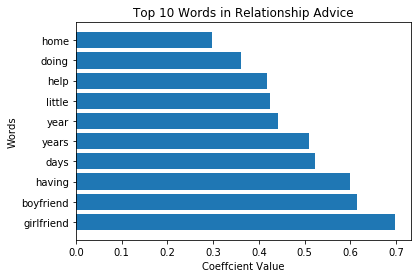

In [55]:
plt.barh(coef_lr_df_top10.index,coef_lr_df_top10[0])
plt.xlabel('Coeffcient Value')
plt.ylabel('Words')
plt.title('Top 10 Words in Relationship Advice')
plt.savefig('../images/Top 10 Relationship Advice Words.png')

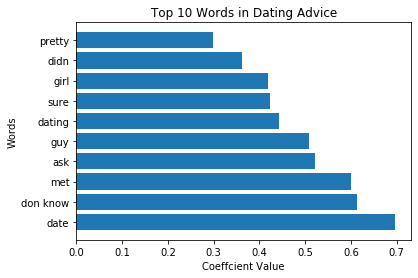

In [56]:
plt.barh(coef_lr_df_bot10.index,coef_lr_df_top10[0])
plt.xlabel('Coeffcient Value')
plt.ylabel('Words')
plt.title('Top 10 Words in Dating Advice')
plt.savefig('../images/Top 10 Dating Advice Words.png')

## Predict Proba

In [57]:
preds = lr.predict(X_test_cv)

In [58]:
confusion_matrix(y_test, # True values.
                 preds)  # Predicted values.

array([[216, 105],
       [117, 213]])

In [59]:
#predict probas, graph it out, model.predict test, take one column
pipe_lr.predict_proba(X_train)

array([[0.33212565, 0.66787435],
       [0.96661475, 0.03338525],
       [0.06761832, 0.93238168],
       ...,
       [0.69879606, 0.30120394],
       [0.57428533, 0.42571467],
       [0.87199523, 0.12800477]])

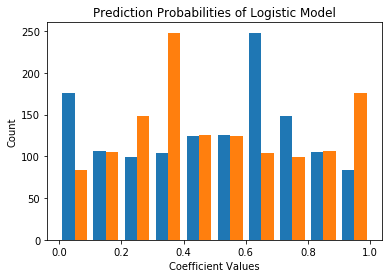

In [60]:
plt.hist(pipe_lr.predict_proba(X_train))
plt.xlabel('Coefficient Values')
plt.ylabel('Count')
plt.title('Prediction Probabilities of Logistic Model')
plt.savefig('../images/Prediction Probabilities of Logistic Model.png')

In [61]:
pipe_lr.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.98,
                                 max_features=100, min_df=2, ngram_range=(1, 2),
                                 preprocessor=None, stop_words='english',
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn'

In [62]:
pipe_params = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}

In [63]:
gs = GridSearchCV(pipe_lr, # what object are we optimizing?
                  pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [64]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.98,
                                                        max_features=100,
                                                        min_df=2,
                                                        ngram_range=(1, 2),
                                            

In [65]:
gs.best_score_

0.7460197119029568

## Pipeline with MultinomialNB

In [66]:
pipe_mnb = Pipeline([
    ('cvec', CountVectorizer(stop_words='english',
                             max_features=100,
                             min_df=2,
                             max_df= .98,
                             ngram_range=(1,2))),
    ('mnb', MultinomialNB())
])

In [67]:
pipe_mnb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.98,
                                 max_features=100, min_df=2, ngram_range=(1, 2),
                                 preprocessor=None, stop_words='english',
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('mnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [68]:
pipe_mnb.score(X_train,y_train)

0.7043214556482184

In [69]:
pipe_mnb.score(X_test,y_test)

0.6620583717357911

In [70]:
pipe_mnb.predict_proba(X_train)

array([[1.11104551e-01, 8.88895449e-01],
       [9.99865498e-01, 1.34502201e-04],
       [5.41414361e-04, 9.99458586e-01],
       ...,
       [8.44590258e-01, 1.55409742e-01],
       [8.02195776e-01, 1.97804224e-01],
       [9.77896305e-01, 2.21036950e-02]])

In [71]:
preds = mnb.predict(X_test_cv)

In [72]:
pipe_mnb.predict_proba(X_train)

array([[1.11104551e-01, 8.88895449e-01],
       [9.99865498e-01, 1.34502201e-04],
       [5.41414361e-04, 9.99458586e-01],
       ...,
       [8.44590258e-01, 1.55409742e-01],
       [8.02195776e-01, 1.97804224e-01],
       [9.77896305e-01, 2.21036950e-02]])

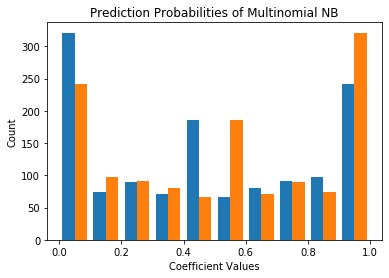

In [73]:
plt.hist(pipe_mnb.predict_proba(X_train))
plt.xlabel('Coefficient Values')
plt.ylabel('Count')
plt.title('Prediction Probabilities of Multinomial NB')
plt.savefig('../images/Prediction Probabitlities of Multinomial NB.png')

In [92]:
X = rel_dat['selftext']
y = rel_dat['subreddit']

In [93]:
xt, xv, yt, yv = train_test_split(X, y, 
                                  random_state=42, 
                                  test_size=.25)

In [95]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import (TfidfVectorizer, 
                                             CountVectorizer)

In [97]:
model = make_pipeline(
    CountVectorizer(stop_words='english',
                             max_features=100,
                             min_df=2,
                             max_df= .98,
                             ngram_range=(1,2)),
    MultinomialNB()
)

In [98]:
model.fit(xt, yt);

In [99]:
model.predict(np.array(['Teng is cool']))

array([1])

In [100]:
model.predict_proba(np.array(['Teng is cool']))

array([[0.49221395, 0.50778605]])

In [101]:
import pickle

In [102]:
!ls -s

total 552
280 Project 3 API and NLP Subreddit-Copy1.ipynb
272 Project 3 API and NLP Subreddit.ipynb


In [110]:
model_fn = 'badtri.pickle'

with open(model_fn, 'wb') as f:
    pickle.dump(model, f)

In [111]:
!ls -s 

total 9856
 288 Project 3 API and NLP Subreddit-Copy1.ipynb
 272 Project 3 API and NLP Subreddit.ipynb
4648 badtri.pickle
4648 wsutt.pickle


In [105]:
with open(model_fn, 'rb') as f:
    loaded_model = pickle.load(f)

In [106]:
loaded_model.classes_

array([0, 1])

In [107]:
test_obs = '''
Did the Russian spacecraft(s) on the ill-fated Phobos mission a few
years ago send back any images of the Martian moon?  If so, does anyone know if
they're housed at an ftp site?
  Thanks.
'''

loaded_model.predict_proba(np.array([test_obs]))

array([[0.27386611, 0.72613389]])

In [108]:
my_test_str = 'I smell' 

loaded_model.predict_proba(np.array([test_obs]))

array([[0.27386611, 0.72613389]])

In [109]:
%%timeit
yhat = loaded_model.predict_proba(np.array([test_obs]))[0][1]

276 µs ± 25.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
